In [20]:
%matplotlib inline
import random
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [21]:
with open("poloniex.json") as f:
    data = json.load(f)

In [22]:
#GET NUMBER OF DATA VALUES TO ANALYSE
len(data)

38428

In [23]:
data_table=json_normalize(data)

#PRINT FIRST 4 VALUES OF TABLE
data_table.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,6.194970,1456790400,6.294355,6.194970,6.294355,1.049409,6.587156,6.277013
1,6.194970,1456792200,6.194970,6.194970,6.194970,0.000000,0.000000,6.194970
2,6.357279,1456794000,6.457196,6.330189,6.330189,1.974781,12.685348,6.423674
3,6.357279,1456795800,6.357279,6.357279,6.357279,0.000000,0.000000,6.357279
4,6.357279,1456797600,6.357279,6.357279,6.357279,0.000000,0.000000,6.357279


In [24]:
# WRITE DATA INTO CSV FILE IN DESKTOP DIRECTORY
data_table.to_csv('/kaushik/etherium_table.csv')
data_table.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,6.194970,1456790400,6.294355,6.194970,6.294355,1.049409,6.587156,6.277013
1,6.194970,1456792200,6.194970,6.194970,6.194970,0.000000,0.000000,6.194970
2,6.357279,1456794000,6.457196,6.330189,6.330189,1.974781,12.685348,6.423674
3,6.357279,1456795800,6.357279,6.357279,6.357279,0.000000,0.000000,6.357279
4,6.357279,1456797600,6.357279,6.357279,6.357279,0.000000,0.000000,6.357279


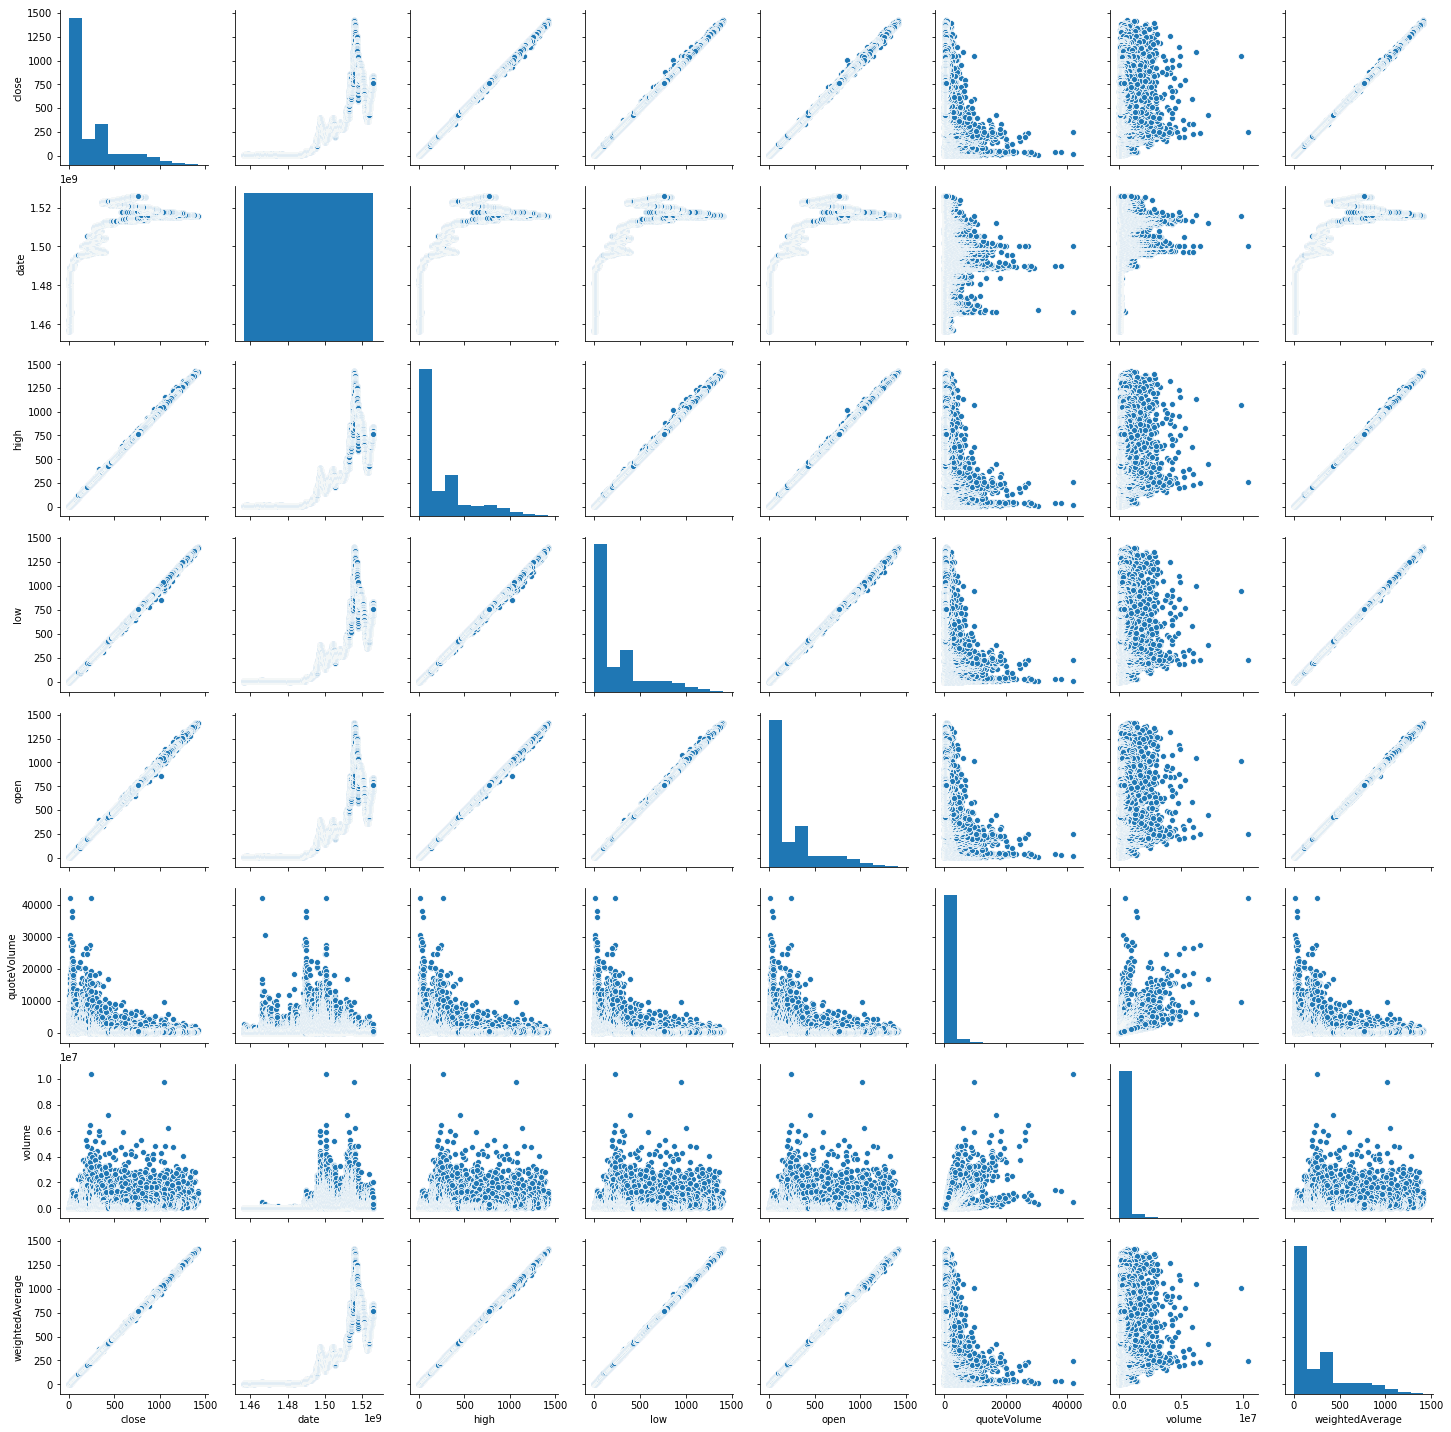

In [25]:
import seaborn as sns
sns.pairplot(data_table)

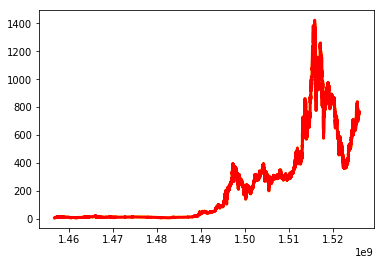

In [31]:
#GET DATATYPES OF THE data_table MADE
data_table.dtypes

#MAKE GRAPH FROM THE DATA RETRIEVED TO DECIDE WHICH ALGORITHM TO BE USED
trace1 = go.Scatter(
                    x=data_table['date'], y=data_table['open'], # Data
                    mode='lines', name='time' # Additional options
                   )

trace2 = go.Scatter(
                    x=data_table['date'], y=data_table['close'], # Data
                    mode='lines', name='time' # Additional options
                   )

trace3 = go.Scatter(
                    x=data_table['date'], y=data_table['high'], # Data
                    mode='lines', name='time' # Additional options
                   )

trace4 = go.Scatter(
                    x=data_table['date'], y=data_table['low'], # Data
                    mode='lines', name='time' # Additional options
                   )

layout1 = go.Layout(title='Open',
                   plot_bgcolor='rgb(230, 230,230)')

layout2 = go.Layout(title='Close',
                   plot_bgcolor='rgb(230, 230,230)')

layout3 = go.Layout(title='High',
                   plot_bgcolor='rgb(230, 230,230)')

layout4 = go.Layout(title='Low',
                   plot_bgcolor='rgb(230, 230,230)')

fig1 = go.Figure(data=[trace1], layout=layout1)
fig2 = go.Figure(data=[trace2], layout=layout2)
fig3 = go.Figure(data=[trace3], layout=layout3)
fig4 = go.Figure(data=[trace4], layout=layout4)


#PLOT THE GRAPH IN IFRAME,OTHERWISE IT WOULD OPEN IN NEW BROWSER WITH PLOT(fig)
plot(fig1, filename='open.html')
plot(fig2, filename='close.html')
plot(fig3, filename='high.html')
plot(fig4, filename='low.html')



plt.plot(data_table['date'],data_table['open'],color="yellow",linewidth=3)
plt.plot(data_table['date'],data_table['close'],color="red",linewidth=3)

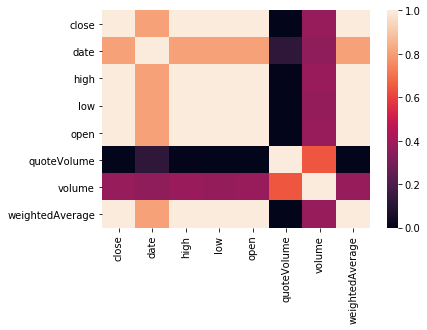

In [33]:
corr = data_table.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [7]:
with open("poloniex.json") as f:
    data = json.load(f)
    
closing = [d["close"] for d in data]
zipped = zip(closing[0:-1], closing[1:])
changes = [d1 / d0 - 1 for d0, d1 in zipped]
length = 40
step = 3
sequences = []
results = []
for i in range(0, len(changes) - length - 2, step):
    sequences.append(changes[i: i + length])
    results.append(closing[i + length + 2] / closing[i] - 1)

sequences = [[[v] for v in sequence] for sequence in sequences]

In [8]:
n_valid = int(0.3 * len(sequences))
x_train = np.array(sequences[:-n_valid])
y_train = np.array(results[:-n_valid])

x_valid = np.array(sequences[-n_valid:])
y_valid = np.array(results[-n_valid:])

In [9]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 1, 10, 100]}]

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
gs = GridSearchCV(SVR(), parameters, cv=5, verbose=5)

x_train_svm = [[x[0] for x in series] for series in x_train]
x_valid_svm = [[x[0] for x in series] for series in x_valid]
gs.fit(x_train_svm, y_train)
clf = gs.best_estimator_
predictions = clf.predict(x_valid_svm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.01, C=0.1, kernel=rbf, score=-0.033444439938619785, total=   1.2s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  gamma=0.01, C=0.1, kernel=rbf, score=-0.17807416379103502, total=   0.9s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV]  gamma=0.01, C=0.1, kernel=rbf, score=-0.23227590156423972, total=   0.9s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV]  gamma=0.01, C=0.1, kernel=rbf, score=-0.00836785821041075, total=   0.8s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s


[CV]  gamma=0.01, C=0.1, kernel=rbf, score=-0.03961634791501045, total=   0.7s
[CV] gamma=0.001, C=0.1, kernel=rbf ..................................
[CV]  gamma=0.001, C=0.1, kernel=rbf, score=-0.040327748058734514, total=   0.7s
[CV] gamma=0.001, C=0.1, kernel=rbf ..................................
[CV]  gamma=0.001, C=0.1, kernel=rbf, score=-0.18843738479124905, total=   0.9s
[CV] gamma=0.001, C=0.1, kernel=rbf ..................................
[CV]  gamma=0.001, C=0.1, kernel=rbf, score=-0.24680195458903986, total=   0.9s
[CV] gamma=0.001, C=0.1, kernel=rbf ..................................
[CV]  gamma=0.001, C=0.1, kernel=rbf, score=-0.018320441113637287, total=   0.8s
[CV] gamma=0.001, C=0.1, kernel=rbf ..................................
[CV]  gamma=0.001, C=0.1, kernel=rbf, score=-0.047964236693890605, total=   0.7s
[CV] gamma=0.0001, C=0.1, kernel=rbf .................................
[CV]  gamma=0.0001, C=0.1, kernel=rbf, score=-0.04125943942479071, total=   0.8s
[CV] gamma=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished
